<a href="https://colab.research.google.com/github/marjansherafati/tensorflow-for-fashion-MNIST-classification/blob/master/Tensorflow_Neural_Net_for_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I start by importing tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

1.14.0


Next I load the fashion MNIST dataset

fashion MNIST is a dataset of pictures of articles of clothing, categorized into 10 categories.

More information on fashion MNIST can be found at https://github.com/zalandoresearch/fashion-mnist

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


As a good first step, I'd like to see what the data looks like.

I use imshow from matplotlib to plot the input for the first training example.

Furthermore, we can print the pixel values and the label type

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

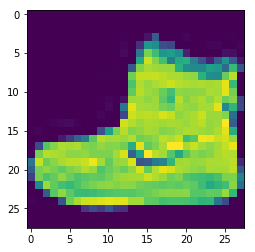

In [3]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

We see that all of the values in the training input are between 0 and 255. It is best to normalize the data to [0-1]. We can do that as follows

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Next, I should design my neural network.

I use a Flatten layer in the beginning to flatten the 28 * 28 pixel values into a vector

In the hidden layer, I am using 128 nodes performing Relu (Rectified Linear Unit)

In the output layer, we have as many nodes as we have classes, and we use softmax to arrive at class probabilities

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

W0913 05:41:24.904243 139710830454656 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


The next thing to do, now the model is defined, is to actually build it.

In [6]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4974 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3749 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3358 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3116 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2937 - acc: 0.8918


I'm only running the model for 5 epochs, to run this fast.

Next, I want to evaluate how my model is doing on unseen data. I use the test set for that purpose

In [7]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3557 - acc: 0.8714


[0.3557282604455948, 0.8714]

##Tuning the neural net parameters: 
first, I want to see the effect of adding nodes to the hidden layer. I repeat the same process, but this time with 512 nodes in the middle layer



In [8]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2003
Epoch 2/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0801
Epoch 3/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0536
Epoch 4/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0364
Epoch 5/5
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0620
[2.5160512e-08 5.3181709e-10 1.3574586e-07 3.9187007e-06 1.9694504e-12
 5.7302563e-10 7.2067504e-13 9.9999571e-01 2.4072233e-09 2.5227584e-07]
7


In this case, training is more accurate, but it also takes a longer time to complete.

Next, I want to investigate if increasing the number of nodes in the middle layer will always result in a more accurate model. This time I use 1024 nodes in my hidden layer 


In [9]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 15s 249us/sample - loss: 0.1841
Epoch 2/5
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0735
Epoch 3/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0492
Epoch 4/5
60000/60000 [==============================] - 15s 251us/sample - loss: 0.0355
Epoch 5/5
10000/10000 [==============================] - 1s 90us/sample - loss: 0.0805
[1.27566775e-08 1.63682318e-10 2.02517576e-08 7.62976356e-07
 3.09967709e-13 2.94662894e-09 1.98163290e-14 9.99998808e-01
 3.17012327e-09 4.23345313e-07]
7


We see that increasing the node count doesn't necessarily result in a decrease in loss and increase in accuracy.

Next, I want to see if adding more layers to the neural net with increase the accuracy. I add a second Relu hidden unit to the neural net structure



In [11]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 13s 225us/sample - loss: 0.1859
Epoch 2/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0789
Epoch 3/5
60000/60000 [==============================] - 14s 239us/sample - loss: 0.0537
Epoch 4/5
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0417
Epoch 5/5
10000/10000 [==============================] - 1s 86us/sample - loss: 0.0777
[4.3330842e-11 7.2760336e-08 8.2878024e-09 9.3750339e-07 5.0423072e-08
 1.4386110e-10 7.8419564e-14 9.9999368e-01 5.6942060e-09 5.1996003e-06]
7


We observe that there isn't a significant impact, because the data is relatively simple.

Next, I want to see the effect of Epoch count on my model's performance. I repeat the same process, but continue training for 15 and 30 epochs (as opposed to 5)

In [13]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

1.14.0
Epoch 1/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2584
Epoch 2/30
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1116
Epoch 3/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0754
Epoch 4/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0562
Epoch 5/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0435
Epoch 6/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0346
Epoch 7/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0271
Epoch 8/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0216
Epoch 9/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0188
Epoch 10/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0147
Epoch 11/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0128
Epoch 12/30
60000/60000

We see that after a certain number of epochs, the loss function stops decreasing.

We need to explicitly input the number of epochs we want the model to run, but what if we wanted to define a cut-off loss (or accuracy)?

We can do that using callbacks. In the following section, I use callbacks with a cut-off of 0.4 for loss. So when my model reaches 0.4 loss, it stops training.

In [14]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




1.14.0
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.4760
Epoch 2/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.3597
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3596


Cheers!